In [ ]:
!pip install --user -U nltk

In [ ]:
%matplotlib inline
import nltk
import re
nltk.download('punkt')



with open('/content/merge_from_ofoct (1).txt') as t:
    text = [l.strip() for l in t]
print(text[100])

text = [t.lower() for t in text][:-10]
print(len(text))

regexp = re.compile(r'chapter \d')
text = [t for t in text if not re.match(regexp, t)]


raw = ' '.join(text)


tokens = [t for t in nltk.word_tokenize(raw) if t not in (',', '“', '”', '"')]


distinct_tokens = set(tokens)
lexical_richness = len(distinct_tokens) / len(tokens)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
might not live to carry it out. It would take many years before the end
235474


In [ ]:
freq = nltk.FreqDist(tokens)
print(freq.most_common(200))

[('the', 176333), ('of', 135880), ('.', 114728), ('and', 98640), ('that', 49635), ('to', 46451), ('in', 44730), ('with', 40783), ('is', 32916), ('a', 30185), ('by', 28127), ('o', 25373), ('his', 23813), ('all', 20521), ('he', 16707), ('thou', 15920), ('as', 15818), ('for', 15551), ('i', 15178), ('(', 14337), (')', 14337), ('this', 13867), ('be', 13228), ('are', 13095), ('one', 13032), ('king', 12954), ('on', 12468), ('it', 12316), ('from', 11917), ("'s", 11752), ('who', 11666), ('son', 11512), ('not', 11461), ('said', 10719), ("'", 10707), ('``', 10700), ('those', 10684), ('their', 10668), ('then', 10347), ('thy', 9595), ('was', 9572), ('great', 9515), ('him', 9355), ('or', 8367), ("''", 8310), ('have', 7942), ('at', 7892), ('thee', 7868), ('!', 7828), ('they', 7646), ('like', 7422), ('which', 7418), ('me', 7254), ('my', 6952), ('also', 6892), ('these', 6837), ('them', 6730), ('battle', 6381), ('having', 6283), ('should', 6048), ('?', 5775), ('there', 5737), ('unto', 5721), ('what', 56

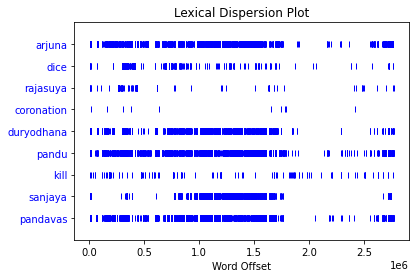

In [ ]:
ntext = nltk.Text(tokens)
ntext.dispersion_plot(['arjuna', 'dice', 'rajasuya', 'coronation',  'duryodhana', 'pandu', 'kill', 'sanjaya', 'pandavas'])

In [ ]:
import random
print(', '.join([w for w in random.sample(freq.hapaxes(), 40)]))

755, kingcraft, 1014, 1016., drona-cloud, inconceivably, despoil, insular, sahasravaeh, milkmaids, jrimbhika, mahatmana, compendious, sahasra-charana, well-believing, popularly, parenthesis, sridhara, 1631, anuprachyuta, dane, repentant, jesters, furtherance, re-invigorated, extempore, re-embodied, unfairness, takshan, lee, sporting-garden, 'form, commerce, peered, 1656, 732., pentaptera, bhaganetra, 968, 1124.


In [ ]:
nltk.download('stopwords')
from nltk.corpus import stopwords
# stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
ntext.collocations(window_size=3)

thou art; thou hast; among men; bharata race; son pandu; vaisampayana
continued; endued great; diverse kinds; tiger among; thus addressed;
three worlds; kuru race; one another; mighty car-warrior; without
doubt; hearing words; sons pandu; behoveth thee; son kunti;
vaisampayana said


In [ ]:
%matplotlib inline
import re
import nltk


def build_regexp(c):
    """
    Creates the appropriate regex for the expressions
    N(M) or N,M
    """
    if '(' in c:
        a, b = c.split(' ')
        b = b[1:-1]
        r = r"{}( {})?".format(a, b)
        return r
    if ',' in c:
        a, b = c.split(',')
        r = r"({}|{})".format(a, b)
        return r    
    return r"{}".format(c)


## save everything
with open('/content/top_chars.txt') as x:
    characters = [l.strip() for l in x]
characters = characters[25:]

with open('/content/merge_from_ofoct (1).txt') as x:
    text = [l.strip() for l in x]
raw = ' '.join(text)

## map the characters
chars = {}

for it, c in enumerate(characters):
    chars[it] = c    
    template = '{}'.format(it)
    regexp = re.compile(build_regexp(c))
    raw = re.sub(regexp, template, raw)

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
import networkx as nx

print('Total characters:', len(characters))

# build the graph
g = nx.Graph()
# add nodes
for c in characters:
    g.add_node(c)

# tokenize the text
words = [n for n in nltk.word_tokenize(raw) if n != ',' and n != '.']

# utils list
characters_rep = [str(i) for i in range(len(characters))]

# forward threshold
fwd_t = 30
# check for each character
for it, c in enumerate(characters):
    for i, word in enumerate(words):
        if word == str(it):
            for d in range(i, i + fwd_t + 1):
                if d < len(words):
                    if words[d] in characters_rep and words[d] != word:
                        src_node = chars[int(word)]
                        target_node = chars[int(words[d])]
                        if target_node not in g[src_node]:
                            g.add_edge(src_node, target_node, weight=1)
                        else:
                            g[src_node][target_node]['weight'] += 0.05

# # remove nodes w/o edges
# removed = set()
# for i in g.nodes():
#     if not g[node]:
#         print('Node w/o edges:', node)
#         g.remove_node(node)
#         removed.add(node)

# print('Total characters minus solitude nodes:', len(g.nodes()))

# nx.write_graphml(g, 'output.graphml')

Total characters: 15


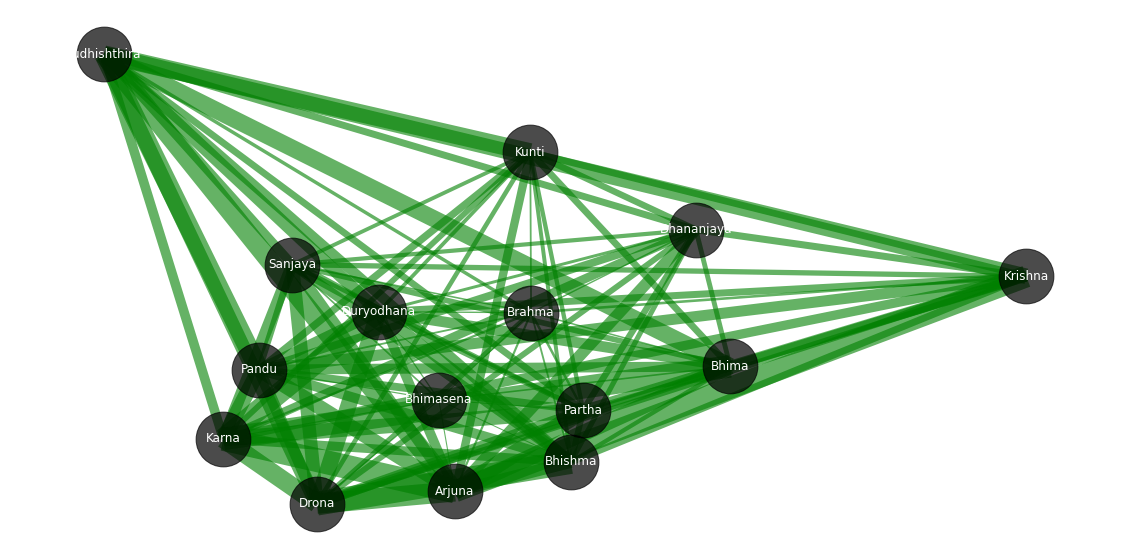

In [ ]:
import networkx as nx
from matplotlib import pyplot as plt

widths = nx.get_edge_attributes(g, 'weight')
nodelist = g.nodes()

plt.figure(figsize=(20,10))

pos = nx.kamada_kawai_layout(g)
nx.draw_networkx_nodes(g,pos,
                       nodelist=nodelist,
                       node_size=3000,
                       node_color='black',
                       alpha=0.7)
nx.draw_networkx_edges(g,pos,
                       edgelist = widths.keys(),
                       width=list(widths.values()),
                       edge_color='green',
                       alpha=0.6)
nx.draw_networkx_labels(g, pos=pos,
                        labels=dict(zip(nodelist,nodelist)),
                        font_color='white')
plt.box(False)
plt.show()

In [ ]:
print(len(g))

In [ ]:
nx.draw_circular(g, with_labels = True)

In [ ]:
# print('Diameter:', nx.diameter(g))
print('Degree centrality:', nx.degree_centrality(g))
print('Betweennes centrality:', nx.betweenness_centrality(g))
print('Closeness centrality:', nx.closeness_centrality(g))
#print('Pagerank:', nx.pagerank(g))

Degree centrality: {'Sahadeva': 0.8974358974358974, 'Madhu': 0.9743589743589743, 'Nakula': 0.9743589743589743, 'Janardana': 1.0, 'Virata': 1.0, 'Bhagadatta': 0.8974358974358974, 'Bharadwaja': 1.0, 'Sweta': 0.8205128205128205, 'Kesava': 0.9743589743589743, 'Drupada': 0.9743589743589743, 'Yama': 0.9743589743589743, 'Sikhandin': 0.923076923076923, 'Santanu': 0.923076923076923, 'Subhadra': 0.9487179487179487, 'Prishata': 0.9743589743589743, 'Indra': 1.0, 'Salya': 0.9743589743589743, 'Abhimanyu': 0.9487179487179487, 'Vasudeva': 1.0, 'Kripa': 0.9487179487179487, 'Dhritarashtra': 1.0, 'Bharata': 1.0, 'Satyaki': 0.9743589743589743, 'Dhrishtadyumna': 0.9487179487179487, 'Pritha': 0.9743589743589743, 'Dhananjaya': 0.9487179487179487, 'Krishna': 1.0, 'Kunti': 1.0, 'Yudhishthira': 1.0, 'Partha': 1.0, 'Brahma': 0.9487179487179487, 'Karna': 1.0, 'Bhima': 0.9743589743589743, 'Bhimasena': 0.5384615384615384, 'Sanjaya': 1.0, 'Duryodhana': 1.0, 'Pandu': 1.0, 'Drona': 1.0, 'Arjuna': 1.0, 'Bhishma': 0.974

In [ ]:
# # print('Diameter:', nx.diameter(g))
# print('Degree centrality:', nx.degree_centrality(g))
# print('Betweennes centrality:', nx.betweenness_centrality(g))
# print('Closeness centrality:', nx.closeness_centrality(g))
# #print('Pagerank:', nx.pagerank(g))

In [ ]:
# import networkx as nx
# from matplotlib import pyplot as plt

# widths = nx.get_edge_attributes(g, 'weight')
# nodelist = g.nodes()

# plt.figure(figsize=(20,10))

# pos = nx.kamada_kawai_layout(g)
# nx.draw_networkx_nodes(g,pos,
#                        nodelist=nodelist,
#                        node_size=3000,
#                        node_color='black',
#                        alpha=0.7)
# nx.draw_networkx_edges(g,pos,
#                        edgelist = widths.keys(),
#                        width=list(widths.values()),
#                        edge_color='blue',
#                        alpha=0.6)
# nx.draw_networkx_labels(g, pos=pos,
#                         labels=dict(zip(nodelist,nodelist)),
#                         font_color='white')
# plt.box(False)
# plt.show()